# Prediction of drug usage in OKCupid users using Machine Learning

This project analyses user data from the online dating application OKCupid. The online dating industry has been growing and these apps use data science to match compatible users based on the information provided by users about themselves.

**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Project Scoping

### Goals

My goal for this project is to apply the skills and techniques that I have learnt in data science (particularly Machine Learning techniques) onto this data set. I will be researching whether an OKCupid user's drug usage can be predicted using other variables from their profiles.

### Data

The project has one data set provided by Codecademy called profiles.csv. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions. This project is important since many users find drug usage habits an important part of matches, and if users don't input their drug usage, OkCupid would like to predict what it might be.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's drug usage, classification algorithms from the supervised learning family of machine learning models will be implemented.

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, and F1 scores.

## Importing Python Modules

In [1]:
## General libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Checking the Data

`profiles` has 59,946 rows and 31 columns. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [3]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

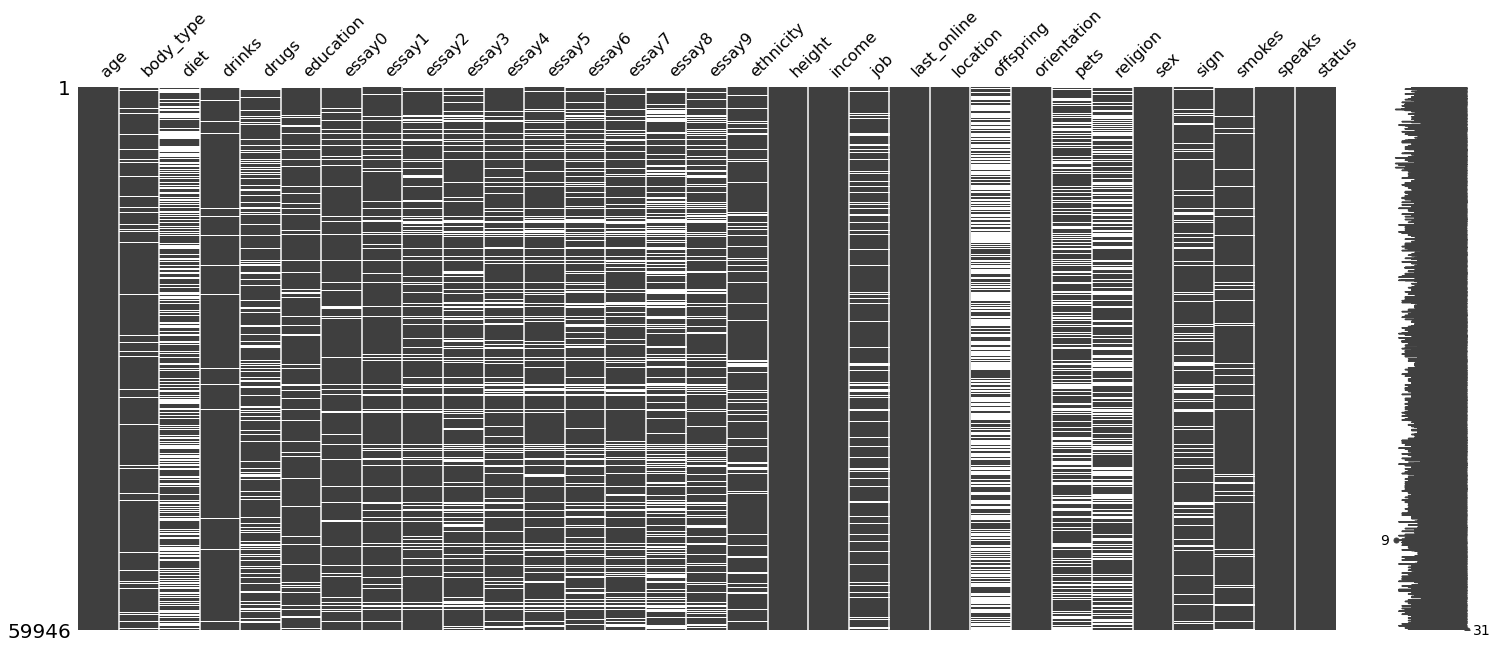

In [4]:
import missingno as msno
msno.matrix(profiles);

## Exploring the Data

### Preliminary Feature Selection

The labels will come from the `drugs` column.

The variables will be:
- **body_type**
- **diet**
- **education**
- **job**
- **offspring**
- **orientation**
- **pets**
- **religion**
- **sex**
- **drinks**
- **smokes**
- **status**

### Labels: `drugs`

There are 3 categories present: `never`, `sometimes`, and `often`. 14080 rows have `nan` values. The vast majority of users `never` use drugs. The current label imbalance is approximately 90:19:1.

Number of categories: 3
Categories: ['never' 'sometimes' nan 'often']
never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64
Number of nan: 14080


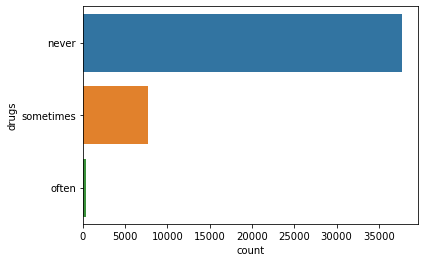

In [5]:
sns.countplot(data=profiles, y="drugs");
print("Number of categories:", profiles.drugs.nunique())
print("Categories:", profiles.drugs.unique())
print(profiles.drugs.value_counts())
print("Number of nan:", profiles.drugs.isnull().sum())

#### Cleaning the labels

Under the assumption that individuals' dating preferences consider drug usage as a binary factor (i.e. whether or not the individual uses drugs or not), the `sometimes` and `often` labels will be combined. `Nan` values will be dropped. The label imbalance will be fixed later on, after splitting into the training and test sets.

0.0    37724
1.0     8142
Name: drugs, dtype: int64
Number of nan: 0


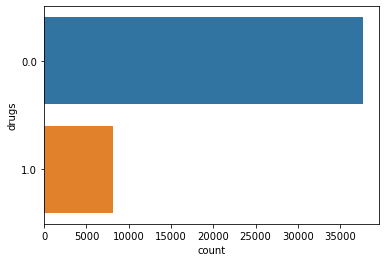

In [6]:
profiles.drugs = profiles.drugs.replace({'sometimes': 1, 'often': 1, 'never':0})
profiles.dropna(subset = ['drugs'], inplace = True)
print(profiles.drugs.value_counts())
print("Number of nan:", profiles.drugs.isnull().sum())
sns.countplot(data=profiles, y="drugs");

### Variables:

### `body_type`
Most users will describe themselves as average, fit, or athletic.

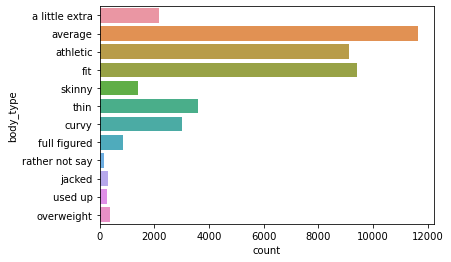

In [7]:
sns.countplot(data=profiles, y="body_type");

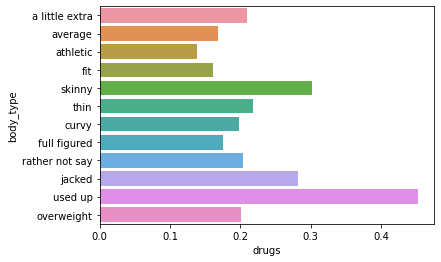

In [8]:
sns.barplot(data=profiles, y="body_type", x='drugs', ci=None);

Even though some of the body types have similar meanings, they vary in proportion of drug users (e.g. `thin` vs `skinny`)

### `sex`
There are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

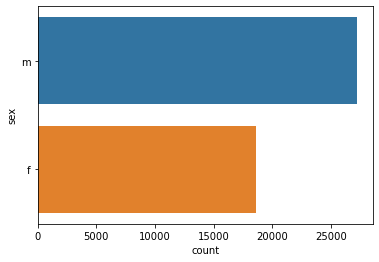

In [9]:
sns.countplot(data=profiles, y="sex");

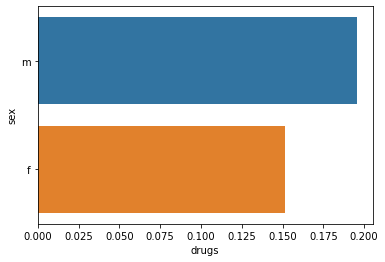

In [10]:
sns.barplot(data=profiles, y='sex', x='drugs', ci=None);

Males tend to use drugs more than females.

### `diet`
Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners.

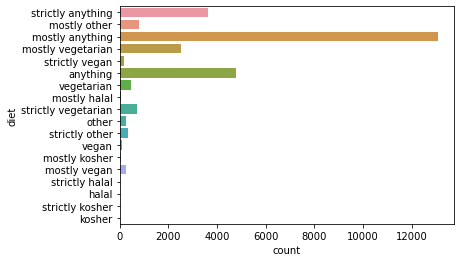

In [11]:
sns.countplot(data=profiles, y="diet");

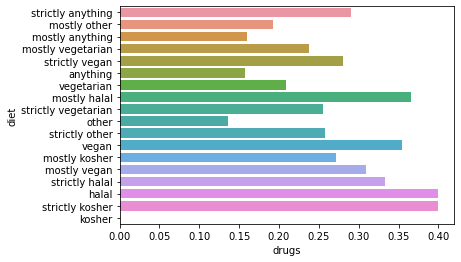

In [12]:
sns.barplot(data=profiles, y='diet', x='drugs', ci=None);

In [13]:
profiles.diet.value_counts()

mostly anything        13105
anything                4805
strictly anything       3653
mostly vegetarian       2530
mostly other             785
strictly vegetarian      698
vegetarian               450
strictly other           333
other                    257
mostly vegan             252
strictly vegan           182
vegan                     96
mostly kosher             70
mostly halal              41
strictly halal            15
strictly kosher           15
halal                     10
kosher                     9
Name: diet, dtype: int64

The diets that have higher concentrations of drug users have very few samples.

### `drinks`

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

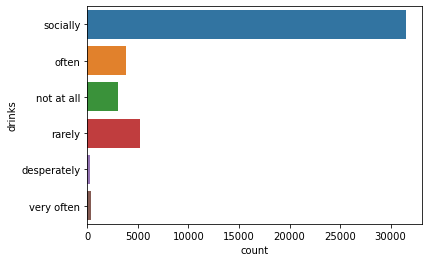

In [14]:
sns.countplot(data=profiles, y="drinks");

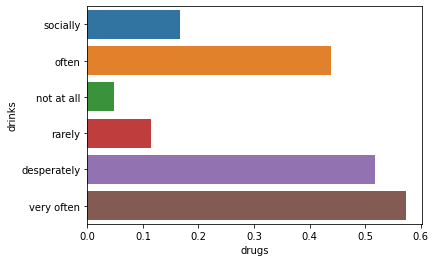

In [15]:
sns.barplot(data=profiles, y='drinks', x='drugs', ci=None);

`desperately` and `very often` have very few samples and will be combined with `often`.

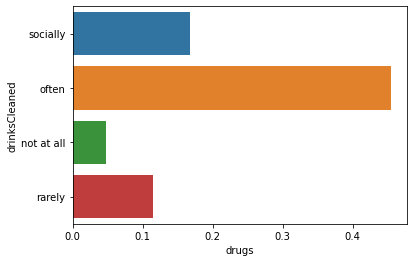

In [16]:
profiles['drinksCleaned'] = profiles.drinks.replace({'desperately': 'often', 'very often': 'often'})
sns.barplot(data=profiles, y='drinksCleaned', x='drugs', ci=None);

### `education`

The majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

graduated from college/university    17706
graduated from masters program        7022
working on college/university         4597
graduated from two-year college       1303
working on masters program            1235
graduated from high school            1223
graduated from ph.d program           1028
working on two-year college            921
graduated from law school              804
dropped out of college/university      779
working on ph.d program                724
college/university                     609
graduated from space camp              498
graduated from med school              370
dropped out of space camp              361
working on space camp                  304
working on law school                  190
two-year college                       186
working on med school                  173
dropped out of two-year college        154
masters program                        105
dropped out of masters program         103
dropped out of ph.d program             94
dropped out

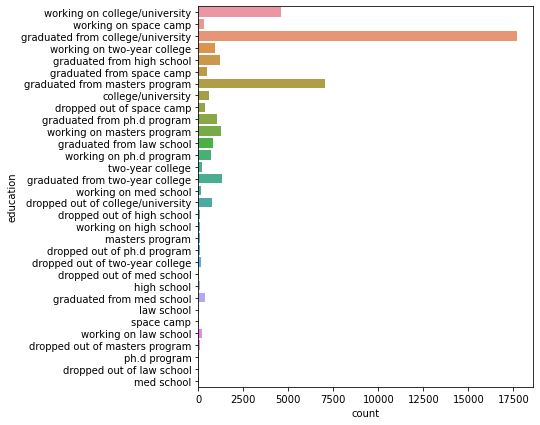

In [17]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");
profiles.education.value_counts()

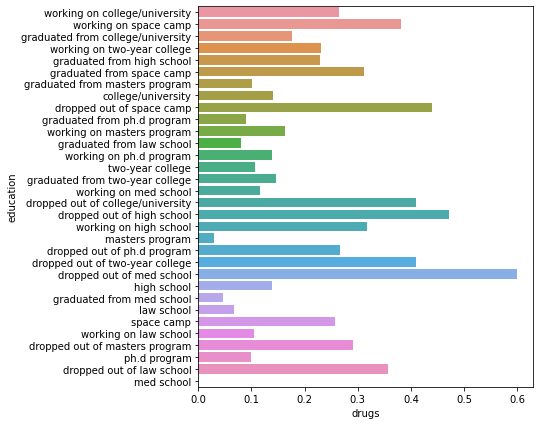

In [18]:
plt.figure(figsize=(6,7))
sns.barplot(data=profiles, y='education', x='drugs', ci=None);

Categories will be combined according to college and below or not.

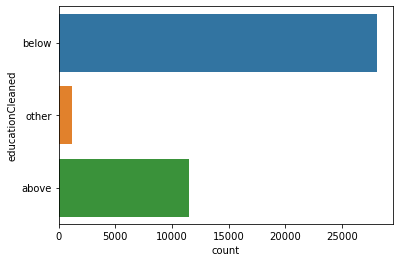

In [19]:
profiles['educationCleaned'] = profiles.education.replace({
    'graduated from college/university': 'below',
    'graduated from masters program': 'above',
    'working on college/university': 'below',
    'graduated from two-year college': 'below',
    'working on masters program': 'above',
    'graduated from high school':'below',
    'graduated from ph.d program':'above',
    'working on two-year college': 'below',
    'graduated from law school': 'above',
    'dropped out of college/university':'below',
    'working on ph.d program':'above',
    'college/university': 'below',
    'graduated from space camp': 'other',
    'graduated from med school': 'above',
    'dropped out of space camp': 'other',
    'working on space camp':'other',
    'working on law school': 'below',
    'two-year college': 'below',
    'working on med school': 'below',
    'dropped out of two-year college': 'below',
    'masters program': 'above',
    'dropped out of masters program': 'above',
    'dropped out of ph.d program': 'above',
    'dropped out of high school': 'below',
    'high school': 'below',
    'working on high school': 'below',
    'space camp': 'other',
    'ph.d program': 'above',
    'law school': 'above',
    'dropped out of law school': 'below',
    'dropped out of med school': 'below',
    'med school': 'below'
})
sns.countplot(data=profiles, y="educationCleaned");

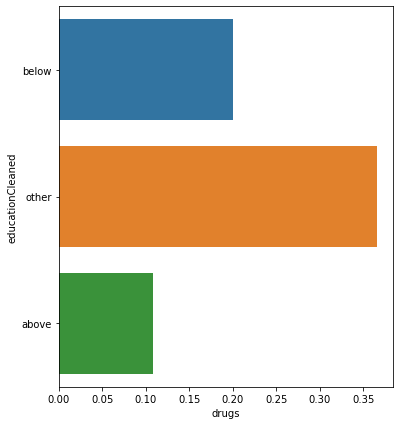

In [20]:
plt.figure(figsize=(6,7))
sns.barplot(data=profiles, y='educationCleaned', x='drugs', ci=None);

Alternatively, grouped according to their status of education, with `space camp`-related categories separated.

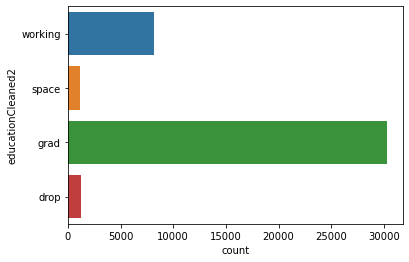

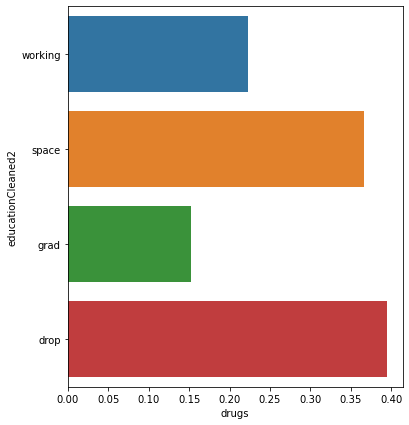

In [21]:
profiles['educationCleaned2'] = profiles.education.replace({
    'graduated from college/university': 'grad',
    'graduated from masters program': 'grad',
    'working on college/university': 'working',
    'graduated from two-year college': 'grad',
    'working on masters program': 'working',
    'graduated from high school':'grad',
    'graduated from ph.d program':'grad',
    'working on two-year college': 'working',
    'graduated from law school': 'grad',
    'dropped out of college/university':'drop',
    'working on ph.d program':'working',
    'college/university': 'grad',
    'graduated from space camp': 'space',
    'graduated from med school': 'grad',
    'dropped out of space camp': 'space',
    'working on space camp':'space',
    'working on law school': 'working',
    'two-year college': 'grad',
    'working on med school': 'working',
    'dropped out of two-year college': 'drop',
    'masters program': 'working',
    'dropped out of masters program': 'drop',
    'dropped out of ph.d program': 'drop',
    'dropped out of high school': 'drop',
    'high school': 'working',
    'working on high school': 'working',
    'space camp': 'space',
    'ph.d program': 'working',
    'law school': 'working',
    'dropped out of law school': 'drop',
    'dropped out of med school': 'drop',
    'med school': 'working'
})
sns.countplot(data=profiles, y="educationCleaned2");
plt.figure(figsize=(6,7))
sns.barplot(data=profiles, y='educationCleaned2', x='drugs', ci=None);

### `job`

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

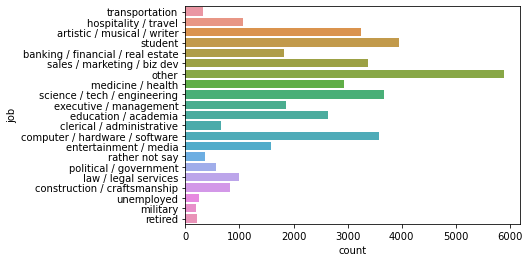

In [22]:
sns.countplot(data=profiles, y="job");

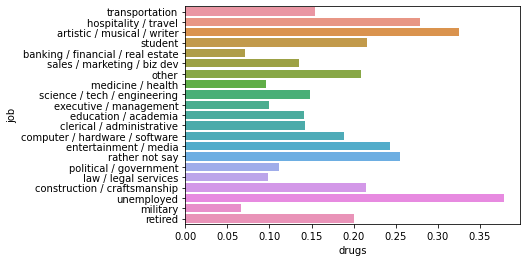

In [23]:
sns.barplot(data=profiles, y='job', x='drugs', ci=None);

### `offspring`

The data suggest that most users do not have kids. 

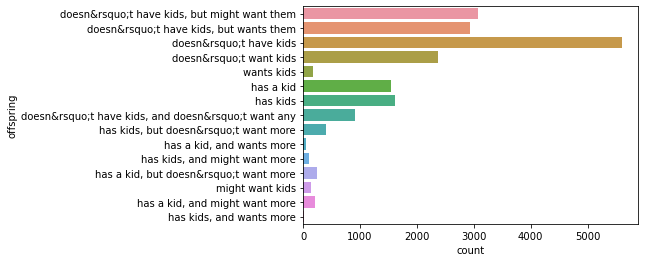

In [24]:
sns.countplot(data=profiles, y="offspring");

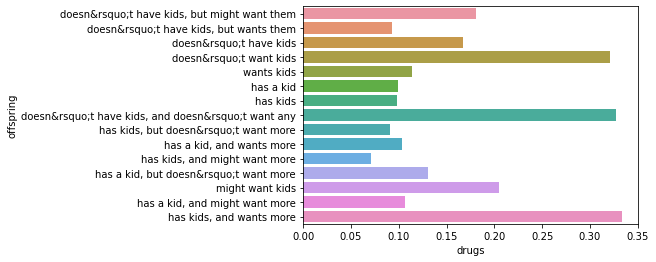

In [25]:
sns.barplot(data=profiles, y='offspring', x='drugs', ci=None);

This data can be further split according to having kids and preference of having kids.

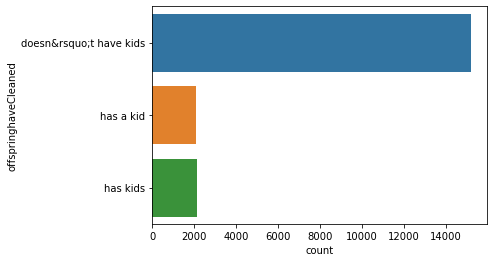

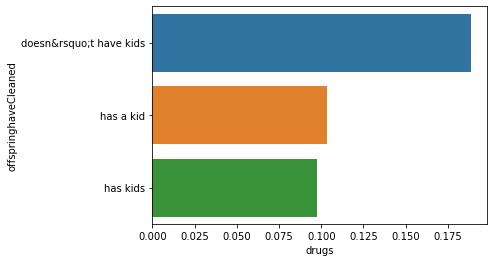

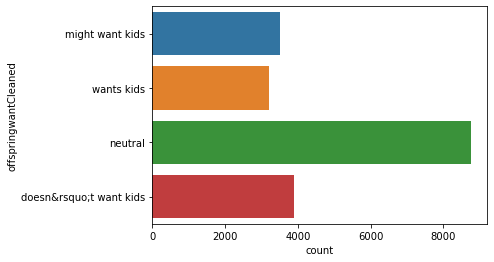

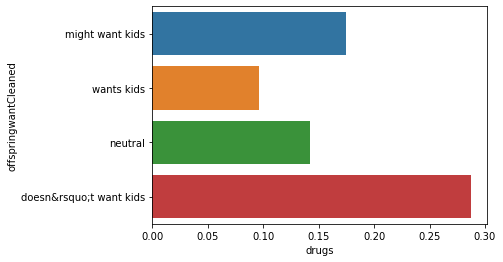

In [26]:
profiles['offspringhave'] = profiles.offspring.str.split(', ').str.get(0)
profiles['offspringwant'] = profiles.offspring.str.split(', ').str.get(-1)
profiles['offspringhaveCleaned'] = profiles.offspringhave.replace({'doesn&rsquo;t want kids': 'doesn&rsquo;t have kids', 'wants kids': 'doesn&rsquo;t have kids', 'might want kids': 'doesn&rsquo;t have kids'})
profiles['offspringwantCleaned'] = profiles.offspringwant.replace({'doesn&rsquo;t have kids': 'neutral', 'but might want them': 'might want kids', 'but wants them': 'wants kids', 'has kids': 'neutral', 'has a kid':'neutral', 'and doesn&rsquo;t want any': 'doesn&rsquo;t want kids', 'but doesn&rsquo;t want more': 'doesn&rsquo;t want kids', 'and might want more': 'might want kids', 'and wants more': 'wants kids'})
sns.countplot(data=profiles, y="offspringhaveCleaned");
plt.show()
plt.clf()
sns.barplot(data=profiles, y='offspringhaveCleaned', x='drugs', ci=None);
plt.show()
plt.clf()
sns.countplot(data=profiles, y="offspringwantCleaned");
plt.show()
plt.clf()
sns.barplot(data=profiles, y='offspringwantCleaned', x='drugs', ci=None);
plt.show()

### `orientation`

The majority of users are straight.

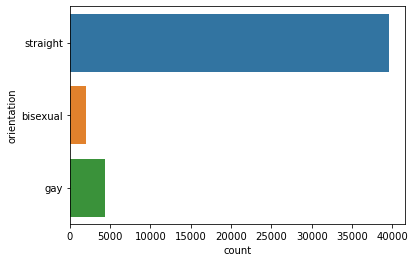

In [27]:
sns.countplot(data=profiles, y="orientation");

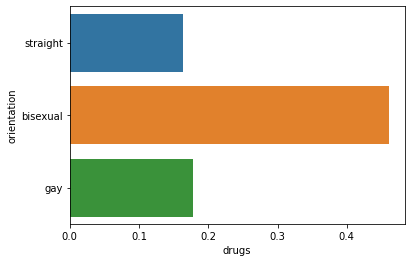

In [28]:
sns.barplot(data=profiles, y='orientation', x='drugs', ci=None);

### `pets`

The chart shows that most users like or has dogs.

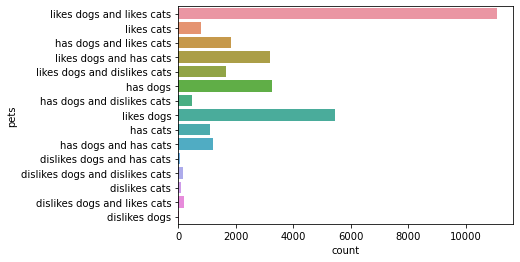

In [29]:
sns.countplot(data=profiles, y="pets");

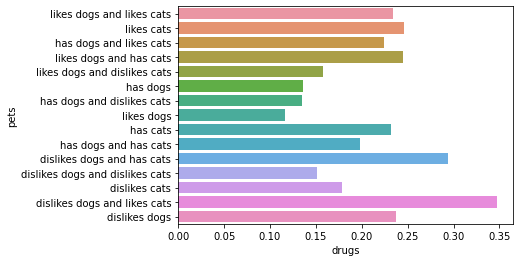

In [30]:
sns.barplot(data=profiles, y='pets', x='drugs', ci=None);

This data can be further split according to dogs and cats.

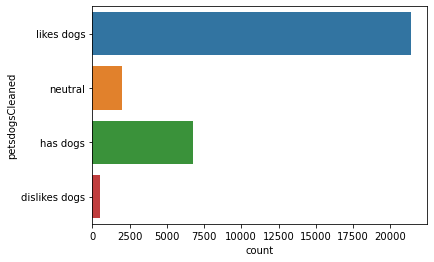

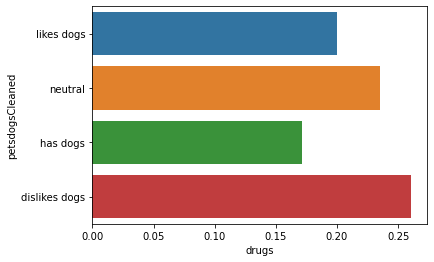

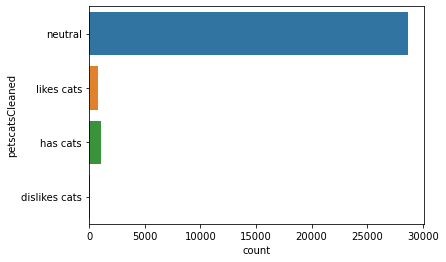

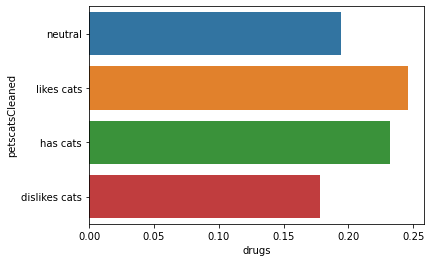

<Figure size 432x288 with 0 Axes>

In [31]:
profiles['petsdogs'] = profiles.pets.str.split(' and ').str.get(0)
profiles['petscats'] = profiles.pets.str.split(' and ').str.get(-1)
profiles['petsdogsCleaned'] = profiles.petsdogs.replace({'has cats': 'neutral', 'likes cats': 'neutral', 'dislikes cats': 'neutral'})
profiles['petscatsCleaned'] = profiles.petsdogs.replace({'has dogs': 'neutral', 'likes dogs': 'neutral', 'dislikes dogs': 'neutral'})
sns.countplot(data=profiles, y="petsdogsCleaned");
plt.show()
plt.clf()
sns.barplot(data=profiles, y='petsdogsCleaned', x='drugs', ci=None);
plt.show()
plt.clf()
sns.countplot(data=profiles, y="petscatsCleaned");
plt.show()
plt.clf()
sns.barplot(data=profiles, y='petscatsCleaned', x='drugs', ci=None);
plt.show()
plt.clf()

### `religion`

Religion has a lot of qualifiers.

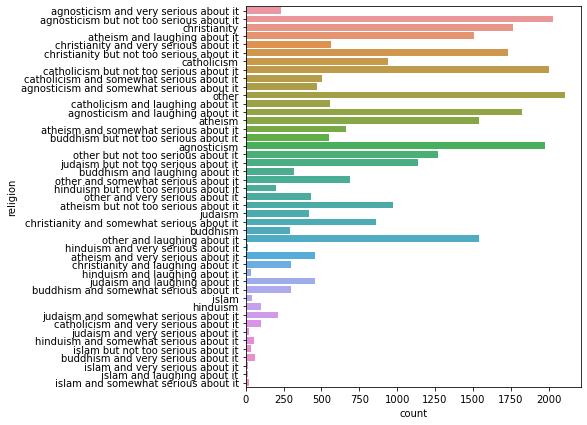

In [32]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

Religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists.

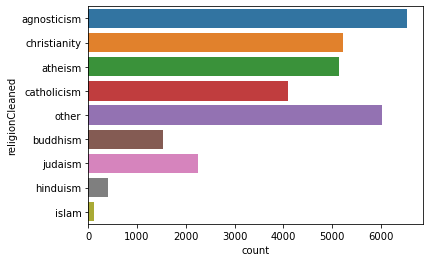

In [33]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

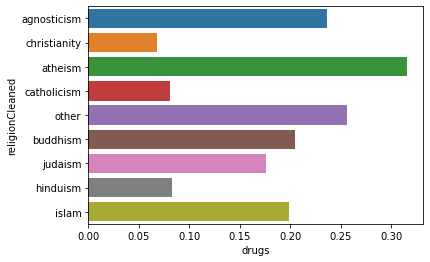

In [34]:
sns.barplot(data=profiles, y='religionCleaned', x='drugs', ci=None);

### `smokes`

Similarly for drugs the majority of users chose "no" for smoking.

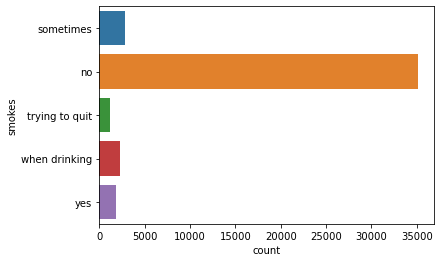

In [35]:
sns.countplot(data=profiles, y="smokes");

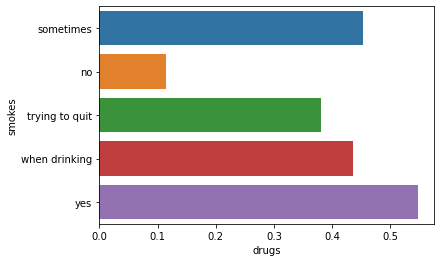

In [36]:
sns.barplot(data=profiles, y='smokes', x='drugs', ci=None);

The data can be cleaned into binary categories.

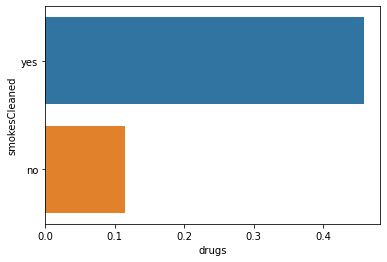

In [37]:
profiles['smokesCleaned'] = profiles.smokes.replace({'sometimes': 'yes', 'trying to quit': 'yes', 'when drinking': 'yes'})
sns.barplot(data=profiles, y='smokesCleaned', x='drugs', ci=None);

### `status`

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

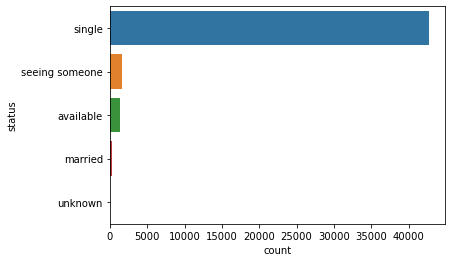

In [38]:
sns.countplot(data=profiles, y="status");

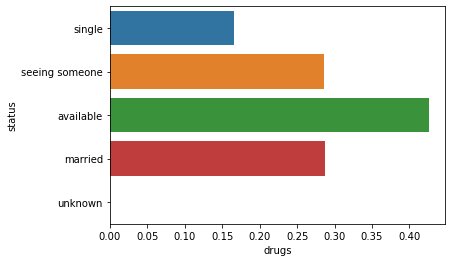

In [39]:
sns.barplot(data=profiles, y='status', x='drugs', ci=None);

## Preparing the Data

### Missing Data

In [40]:
profiles.isnull().sum()

age                         0
body_type                3591
diet                    18560
drinks                   1613
drugs                       0
education                5013
essay0                   4356
essay1                   6092
essay2                   7688
essay3                   8787
essay4                   8526
essay5                   8511
essay6                  10929
essay7                   9654
essay8                  15049
essay9                  10012
ethnicity                3962
height                      1
income                      0
job                      5877
last_online                 0
location                    0
offspring               26483
orientation                 0
pets                    15221
religion                14535
sex                         0
sign                     8309
smokes                   2749
speaks                     25
status                      0
drinksCleaned            1613
educationCleaned         5013
educationC

After evaluating the models on different collumns, these are the variables that provide the most useful information without large amounts of noise or `nan` values.

In [41]:
#cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
#       'sex', 'job', 'drugs']
#cols = ['body_type', 'diet', 'educationCleaned', 'offspringwantCleaned', 'offspringhaveCleaned', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'drinks', 'smokes', 'status', 'drugs']
#cols = ['education', 'orientation', 'sex', 'job', 'drinks', 'smokes', 'status', 'religionCleaned', 'drugs']
cols = ['diet', 'sex', 'drinksCleaned', 'smokesCleaned', 'religionCleaned', 'orientation', 'drugs']
df = profiles[cols].dropna()
df.shape

(19430, 7)

### Dummy Variables

In [42]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head()

,drugs,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,...,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,orientation_bisexual,orientation_gay,orientation_straight
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,0.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Splitting the Data

In [43]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.drop(columns = 'drugs')
Y = df.drugs

#Validation chunk size
val_size = 0.20

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

#upsampling X_train, Y_train
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

### Label Imbalance

After upsampling, the labels are balanced.

In [44]:
df_describe = pd.DataFrame(Y_train)
df_describe.value_counts()

0.0    12331
1.0    12331
dtype: int64

## Prediction

### Model Building

For this project four common algorithms will be used to make predictions. Below, the respective modules for Logistic Regression, Decision Trees, KNN, and Random Forest are loaded.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score

#### Evaluation Metrics

In the models, there will be several values that can be evaluated:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict.

Given that the intent of predicting drug usage is to filter out possible drug users from being matched with people who don't want to be matched with drug users, the goal is to maximise the number of true positive drug users while minimising the number of false negative drug users as they will be incorrectly shown as a potential matches. Hence, the key evaluation metric will be `recall`.

#### Logistic Regression

The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model preformed.

In [46]:
lr_model = LogisticRegression(multi_class="multinomial", max_iter =10000).fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_val)

The final accuracy of the logistic regression model is 77% which is decent considering a random guess should result in being correct 50% of the time (1/2). However, in terms of recall, 61% means that 4/10 drug users would be incorrectly shown as a potential match.

In [47]:
print(classification_report(Y_val, lr_predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      3080
         1.0       0.46      0.61      0.52       806

    accuracy                           0.77      3886
   macro avg       0.68      0.71      0.69      3886
weighted avg       0.80      0.77      0.78      3886



#### K Nearest Neighbor

The next models is the `KNeighborsClassifier` which will take `k` of it's neighbors to predict the signs. The value for `n_neighbors` is looped through in order to find the optimal `k`. This model had a 71% recall which is a good sign.


In [64]:
recall_scores = []
for k in range(1,45,2):
    knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
    prediction = knn_model.predict(X_val)
    recall = recall_score(Y_val, prediction)
    recall_scores.append(recall)

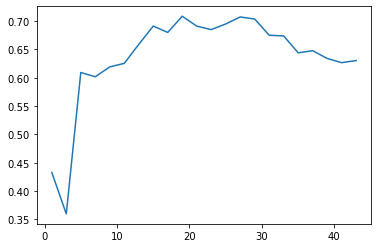

In [65]:
plt.plot(range(1,45,2), recall_scores)
plt.show()

In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 19).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(classification_report(Y_val, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      3080
         1.0       0.40      0.71      0.51       806

    accuracy                           0.71      3886
   macro avg       0.65      0.71      0.65      3886
weighted avg       0.80      0.71      0.74      3886



#### Decision Trees

This is the decision tree model. The results are not great because it has a 57% with this model.

In [51]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_val)

In [52]:
print(classification_report(Y_val, cart_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      3080
         1.0       0.44      0.57      0.50       806

    accuracy                           0.76      3886
   macro avg       0.66      0.69      0.67      3886
weighted avg       0.79      0.76      0.77      3886



#### Random Forest
Results are only slightly better than the Decision Tree model with 59% recall, with no improved results in any other metric.

In [53]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=0).fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_val)

In [54]:
print(classification_report(Y_val, rf_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      3080
         1.0       0.44      0.59      0.50       806

    accuracy                           0.76      3886
   macro avg       0.66      0.70      0.67      3886
weighted avg       0.79      0.76      0.77      3886



### Best performing model: K Nearest Neighbor
Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis.

In [67]:
from sklearn.metrics import confusion_matrix 
knn_cm = confusion_matrix(Y_val, knn_predictions)
knn_labels = knn_model.classes_

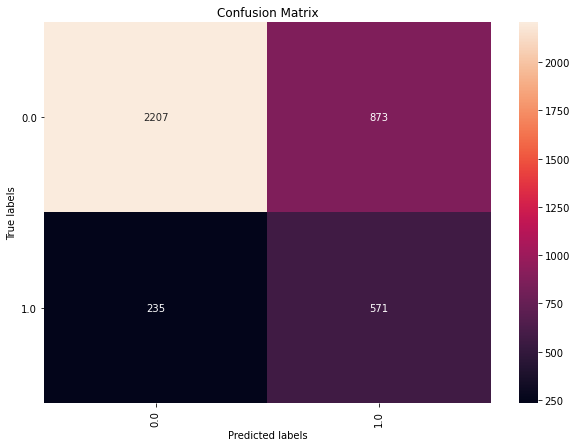

In [68]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(knn_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

The model performs poorly (26%) on a five-fold cross-validation created from the same data, meaning it doesn't generalise well.

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(knn_model, X_val, Y_val, cv=kfold, scoring='recall')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.2195122  0.21192053 0.25149701 0.28658537 0.34375   ]
Baseline: 26.27% (4.84%)


## Conclusion

In this project machine learning was used to predict the drug usage of OkCupid users. This is an important feature since many people feel strongly against drug usage and would not want to match with someone who takes drugs. If users don't input their drug usage, an algorithmic solution could have generated a prediction to impute missing data when making matches.

However, given the large amount of `nan` values in the data set, it was difficult to consider many variables in the models without significantly reducing the effective sample size.

The approach towards this project was largely data-centric as my current knowledge of models is limited, but in future projects I would like to explore the possibilities of a model-centric approach as well.